In [1]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns # type: ignore
from IPython.display import clear_output # type: ignore

In [2]:
path = './data/house_pricing_train.csv'
df = pd.read_csv(path, index_col='Id')
target_col = 'SalePrice'
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


$$
\textbf{1: }\\
\textbf{EDA, методы обёртки и фильтрации}
$$

$$
\text{Отбор признаков:} \\
\text{Отбор признаков - это сечение ненужных и оценка важности признаков при построении ML модели.} \\
\text{Зачем отбирать признаки:} \\
\text{Линейно-зависимые признаки ведут к мультиколлинеарности и переобучению} \\
\text{Признаков может быть очень много, в таком случае лучше отбросить маловажные признаки для сокращения времени обучения.} \\
\text{Признаки могут собираться из платных источников, таких как биржевые терминалы, или}\\
\text{для их получания необходимо затрачивать другие ресурсы (парсинг и т.д.)}
$$

$$
\textbf{EDA} - \text{exploratory data analysis (разведочный анализ данных)} \\
\text{Предварительное изучения данных с целью определения взаимосвязей, характеристик признаков.}\\
\text{Предполагает использование графиков и статистических методов.}\\
\text{Плюсы: наглядность и отсутствие вычислений}\\
\text{Минусы: отсутствие точных численных оценок, упор на интуицию}\\
$$

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

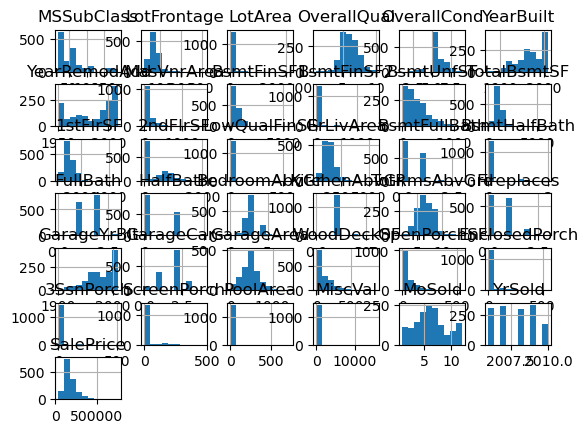

In [3]:
df.hist()

$$
\text{Самый базированный метод - df.hist(), строит гистограммы для численных признаков в датасете.
}

$$
\text{Построим scatterplot'ы для признаков "площадь" и "год постройки", по оси ординат у нас будет таргет:} \\
\text{Как мы можем видеть, для первой переменной сложно выяснить какую-то точную взаимосвязь, для второй мы} \\
\text{можем провести примерную гиперплоскость (т.е. прост прямую)}
$$

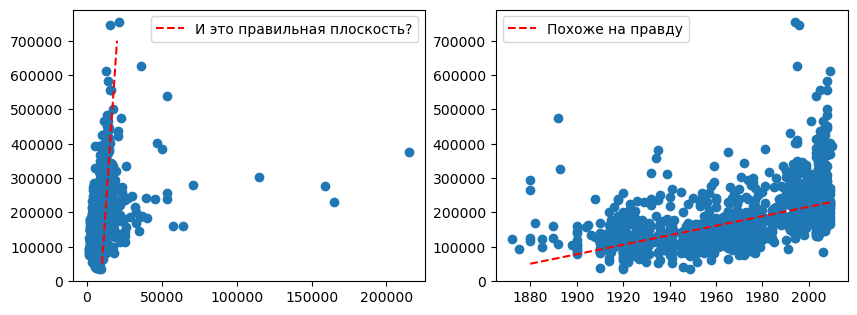

In [4]:
fig = plt.figure(figsize=(10, 12))
fig.add_subplot(3, 2, 1)
plt.scatter(df['LotArea'], df['SalePrice'])
plt.plot([10_000, 20_000], [50_000, 700_000], 'r--', label = 'И это правильная плоскость?')
plt.legend(loc = 'upper right')
fig.add_subplot(3 ,2, 2)
plt.scatter(df['YearBuilt'], df['SalePrice'])
plt.plot([1880, 2010], [50_000, 230_000], 'r--', label = 'Похоже на правду')
plt.legend(loc = 'upper left')
plt.show()

In [5]:
# Выберем категориальные признаки
cat_cols = df.select_dtypes(['object']).columns
cat_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

$$
\text{С помощью barplot или .bar() можно посмотреть на распределение и влияние категориальных признаков на фичу.} \\
\text{Просто строим через plt.bar("Категория", "Таргет")}.
\text{Как мы видим на следующих графиках - категории оказывают значительное влияние\\}
\text{ на таргетные переменные}
$$

In [6]:
def plot_all():
    fig = plt.figure(figsize=(13, len(cat_cols) * 2))
    for i, j in enumerate(cat_cols, 1):
        fig.add_subplot(len(cat_cols) // 3 + 1, 3, i)
        plt.title(j)
        plt.bar(df[j].astype(str), df['SalePrice'])
        plt.xticks(rotation = 45)
        clear_output()
        print(f'{j} ploted ({i}/{len(cat_cols)})')
    plt.show()
plot_all()

$$
\text{LineChart - диаграмма показывающая изменения во времени} \\
\text{Берём фичу только если есть значительные изменения по y (таргету)}
$$

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

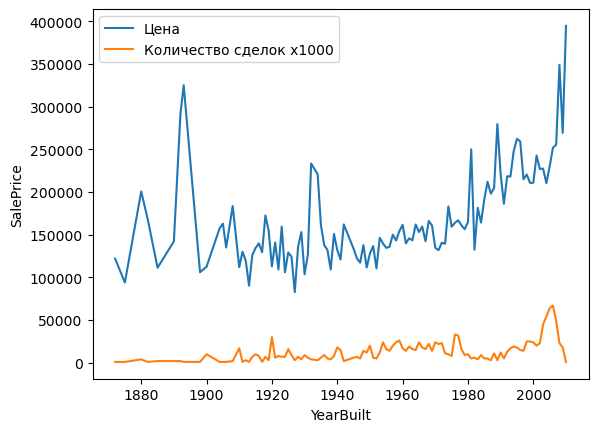

In [7]:
sns.lineplot(df.groupby('YearBuilt')['SalePrice'].mean(), label = 'Цена')
sns.lineplot(df.groupby('YearBuilt')['SalePrice'].count() * 1000, label = "Количество сделок х1000")

$$
\text{BoxPlot - ящик с усами} \\
\text{Замерим топ 25\% значений, топ 75\% значений, они и образуют ящик.}\\
\text{ Нарисуем линией }\textbf{среднее }\text{ и усики длинной 1.5 ящика} 
$$

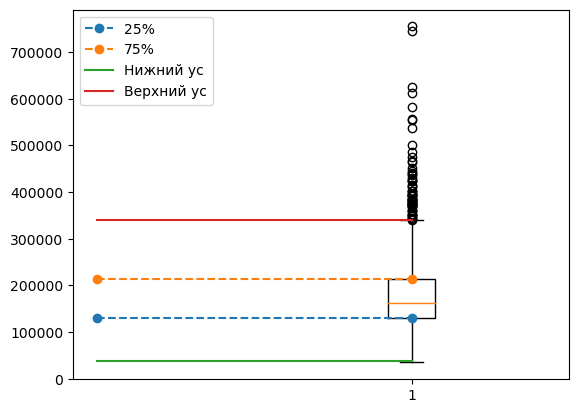

In [8]:
plt.boxplot(df['SalePrice'])
mean = df['SalePrice'].mean()
top = np.percentile(df['SalePrice'], 25)
bot = np.percentile(df['SalePrice'], 75)
plt.plot([top, top], 'o--', label = '25%')
plt.plot([bot, bot], 'o--', label = '75%')
delta = bot - top
bot_us = top - delta * 1.1

top_us = bot + delta * 1.5
plt.plot([bot_us, bot_us],label= "Нижний ус")
plt.plot([top_us, top_us], label= "Верхний ус")
plt.legend(loc = 'upper left')

$$
\textbf{Метод обёртки - } \text{заключается в прямом переборе признаков в обучении и замерки качества.} \\
\text{Главный минус - } n^2 \text{ сложность}
$$


$$
\textbf{Метод прямого отбора - } \text{строи модель по каждой фиче и выбираем лучшую, потом}\\
\text{строим модель на 1-м признаке и перебираем остальные, опять выбираем лучший.} \\
\text{стром модель на 1-м 2-м и перебираем остальные и так далее, пока нас устраивает качество.} \\
$$


$$
[нет \ модели]
 ->
 \begin{bmatrix}
    \text{модель на 1-й фиче} \\
    \text{модель на 2-й фиче} \\
    \text{модель на 3-й фиче} \\
    \text{...} \\
    \text{модель на n-й фиче} \\
 \end{bmatrix} 
 ->
 \text{[5 лучший признак]} 
 ->
  \begin{bmatrix}
    \text{модель на 5-й и 1-й фиче} \\
    \text{модель на 5-й и 2-й фиче} \\
    \text{модель на 5-й и 3-й фиче} \\
    \text{...} \\
    \text{модель на 5-й и n-й фиче} \\
 \end{bmatrix} 
 -> \\
 -> \text{[5 и 7 лучшие признаки]}
 ->
   \begin{bmatrix}
    \text{модель на 5-й, 7-й и 1-й фиче} \\
    \text{модель на 5-й, 7-й и 2-й фиче} \\
    \text{модель на 5-й, 7-й и 3-й фиче} \\
    \text{...} \\
    \text{модель на 5-й, 7-й и n-й фиче} \\
 \end{bmatrix} 
 -> \
 ... \
 -> \
 \text{Так, пока нас не устроит качество}
$$

$$
\textbf{Метод обратного отбора - }\text{тоже самое, что и при прямом отборе, только сначала строим модель на }\textbf{всех фичах}, \\
\text{потом отбираем тот, от которого мы не теряем в качестве и }\textbf{выбрасываем его.} \\
\text{Так повторяем до тех пор, пока не найдём лучшее качество.}


$$
\text{[модель на всех признаках]}
 ->
 \begin{bmatrix}
    \text{модель без 1-й фичи} \\
    \text{модель без 2-й фичи} \\
    \text{модель без 3-й фичи} \\
    \text{...} \\
    \text{модель без n-й фичи} \\
 \end{bmatrix} 
 ->
 \text{[модель без 5-й]} 
 ->
  \begin{bmatrix}
    \text{модель без 5-й и 1-й фичей} \\
    \text{модель без 5-й и 2-й фичей} \\
    \text{модель без 5-й и 3-й фичей} \\
    \text{...} \\
    \text{модель без 5-й и n-й фичей} \\
 \end{bmatrix} 
 -> \\
 -> \text{[модель без 5-й и 7-й]}
 ->
   \begin{bmatrix}
    \text{модель без 5-й, 7-й и 1-й фичей} \\
    \text{модель без 5-й, 7-й и 2-й фичей} \\
    \text{модель без 5-й, 7-й и 3-й фичей} \\
    \text{...} \\
    \text{модель без 5-й, 7-й и n-й фичей} \\
 \end{bmatrix} 
 -> \
 ... \
 -> \
 \text{Так, пока нас не устроит качество}
$$

Плюсы: не требует обработки данных, получаем полную картину возможных точностей модели.

Минусы: долго и очень дорого, высокая склонность к переобучению и неточность результата:

"вдруг надо было выкинуть другой признак?"

$$
\textbf{Методы фильтрации.}\\
\text{Основная идея в том, чтобы посмотреть на взаимосвязь признаков между собой и таргетом.}\\
\text{Корреляция } corr_{xy} = \frac{\sum{(x_i-\bar{x})} *\sum{(y_i-\bar{y})} }{\sqrt{\sum{(x_i-\bar{x})^2} *\sum{(y_i-\bar{y})^2} }} \\
\text{где }\bar{x} \ и \ \bar{y}\text{ - средние значения по выборке} \\
\text{Называется коэффициентом корреляции Пирсона.} \\
\text{С помощью df.corr() можем построить матрицу коррелация признаков.}

In [9]:

print('размер матрицы корреляций:',df[df.select_dtypes(exclude = ['object']).columns].corr().shape)
df[df.select_dtypes(exclude = ['object']).columns].corr().head()

размер матрицы корреляций: (37, 37)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856


$$
\text{Так же, для вещественных признаков мы можем спокойно считать }\textbf{Дисперсию.} \\
D = \frac{\sum{(x_i-\bar{x}) ^ 2}}{n}, \ n \ - \ размер, \ \bar{x} \ - \ среднее \\
\text{Т.е., дисперсия - это средний квадрат отклонений признака от средней величины. }\\
\text{То есть, дисперсия - это среднеквадратичное отклонение. Что нам это даёт?} \\
\text{Если дисперсия мала (около нуля), то признак практически не меняется => его можно выкинуть, так как } \\
\text{он возможно не оказывает значительного влияния на таргет.} \\
\text{считается как df['Признак'].var()}
$$

In [10]:
df['YearBuilt'].var(), np.var(df['YearBuilt']) # хз чо они разные, если честно. Видимо по-разному считаются

(912.2154126019891, 911.5906075248645)

Плюсы: методы фильтрации позволяют быстро и без особых рассчётов избавиться от линейно зависимых признаков и мультиколлинеарности

Минусы: требуют работы с данными, не улавливают сложных взаимоотношений между данными, только линейные

$$
\textbf{2:}\\
\textbf{Работа с пропущенными значениями и выбросами}
$$

$$
\text{Одним из самых простых способов заполнить пустые значения является заполнение константой. Т.е., мы берём среднее .mean()} \\
\text{или медиану .median() или вообще 0, и заполняем ими все пропущунные значения.} \\
\text{Так же, мы можем заполнить значения предыдущими значениями.} \\
\text{Вариантом для категориальных признаков будет заполниь значения most\_frequent (самым популярным) значением, или строкой 'NAN'} \\
\text{или посмотреть, какие значения принимают переменные в похожих (ближайших) объектов.} \\
$$

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent') # or 'mean', or 'median', or 'constant'
print('До трансформации np.nan: ', df['LotFrontage'].isna().sum())
transformed = pd.Series(imputer.fit_transform(df[['LotFrontage']])[0])
print('После трансформации np.nan: ', transformed.isna().sum())

До трансформации np.nan:  259
После трансформации np.nan:  0


$$
\text{В sklearn уже есть встроенный трансформер SimpleImputer, куда в strategy = и можно передать значения most\_frequent, median, mean и т.д.} \\
\text{находится он в классе sklearn.imputers}

In [12]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
print('До трансформации np.nan: ', df['LotFrontage'].isna().sum())
transformed = pd.Series(imputer.fit_transform(df[['LotFrontage']])[0])
print('После трансформации np.nan: ', transformed.isna().sum())

До трансформации np.nan:  259
После трансформации np.nan:  0


$$
\text{ KNNImputer - это как рах тот imputer, который заполняет значениями из похожих классов.}

$$\textbf{2.2: Работа с выбросами}

$$\text{Представим, что между признаком - фичой и таргетом есть некоторая зависимость, ограниченная каким-то шумом, тогда} \\
\textbf{выброс - }\text{это точки, откланяющиеся от зависимость больше, чем на величину шума.}

{'whiskers': [<matplotlib.lines.Line2D at 0x20a56ec6410>,
 'caps': [<matplotlib.lines.Line2D at 0x20a56ec7d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x20a56ec5510>],
 'medians': [<matplotlib.lines.Line2D at 0x20a56ef5490>],
 'fliers': [<matplotlib.lines.Line2D at 0x20a56ef5e50>],
 'means': []}

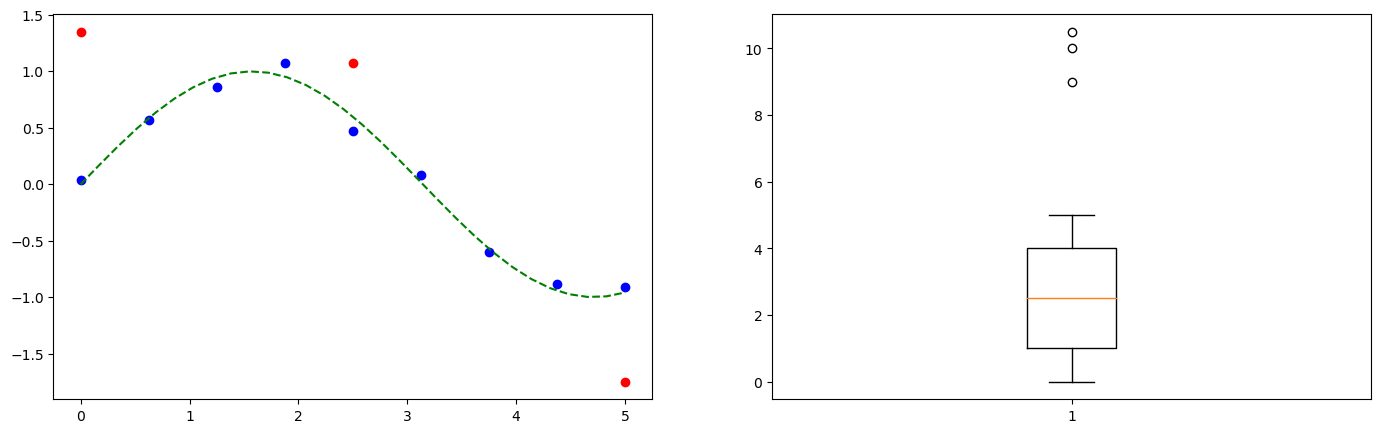

In [13]:
fig = plt.figure(figsize = (17, 5))
fig.add_subplot(1, 2, 1)
x = np.linspace(0, 5, 30)
y = np.sin(x)
plt.plot(x, y, 'g--')

x_dots = np.linspace(0, 5, 9)
noise = np.random.uniform(-0.15, 0.15, 9)
y_dots = np.sin(x_dots) + noise 
plt.scatter(x_dots, y_dots, color = 'b')

x_dots2 = np.linspace(0, 5, 3)
noise2 = np.random.uniform(-2,  2, 3)
y_dots2 = np.sin(x_dots2) + noise2 
plt.scatter(x_dots2, y_dots2, color = 'r')

fig.add_subplot(1, 2, 2)
x_new = np.hstack((x, [9, 1], [10, 1], [10.5, 1]))
plt.boxplot(x_new)

$$\text{отсутствие обработки выбросов (отмечены красными точками) влечёт за собой переобучение модели под train.} 

$$\text{Чтобы убрать выбросы по аналогии с ящиком с усами, достаточно взять top75\% (или снизу, если выбросы снизу), найти 1.5 * delta = 1.5 * (top - bottom)} \\
\text{и убрать строки из датафрейма, в которых значения больше чем > top25\% + 1.5 delta }

$$\textbf{Работа с категориальными признаками:}


$$\text{Advanced счётчики:}\\
\text{У нас есть обычный счётчик (который превращает соответствующие категориальные признаки в [1, 2, 3 , ..] и т.д.)}\\
\text{Но такой счётчик может приводить к мультиколлинеарности и переобучению. Как этого избежать?} \\
\text{Можно добавить к счётчику шум, но это приведёт к снижению корреляции с таргетом.} \\
\text{Можно сделать кросс-валидацию счетчикам, но мне впадлу это писать сейчас}

$$\textbf{3:}\\
\textbf{TF IDF, Лемматизация, Стемминг: Выделение признаков из текста.}

$$\text{Самый простой и топорный метод выделить признаки из текста - bag-of-words (очень похоже на onehotencoding)} \\
\text{Суть в том, чтобы заполнить для каждого слова из всей таблицы, по столбцу, в котором будет количество вхождений слова для каждого объекта.} \\
\text{(сорян, но пример приводить не буду)}

$$\text{Более практичным приёмом будет }\textbf{TF-IDF} \\
\text{term frequency - inverse document frequensy } \\
TF(t,d) = \frac{n_t}{\sum^{d}_i n_i}, \ \text{где }n_t\text{ - это количество слова t в описание d} \\
\text{Это показатель, насколько слово важно для описания.} \\
IDF(t, D) = \log{\frac{|D|}{\{d_i\in D | t \in d_i\}}}, \ \text{ где |D| - кол-во описаний, а в знаменателе - } \\
\text{количество описаний со словом t}. \\
\text{То есть, насколько данное слово является общим для всех описаний.}

Плюсы: Более компактный чем bag-of-words

Минусы: Не погружается в контекст, тупо считает количество


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    "This is a sample document. It has multiple sentences.",
    "Another document with different sentences.",
    "This document is similar to the first one."
]
v = TfidfVectorizer()
trans = v.fit_transform(corpus)
features = v.get_feature_names_out()
print('Получаем TF - IDF матрицу:')
pd.DataFrame(trans.toarray(), columns=features)

Получаем TF - IDF матрицу:


,another,different,document,first,has,is,it,multiple,one,sample,sentences,similar,the,this,to,with
0,0.000000,0.000000,0.239447,0.000000,0.405419,0.308332,0.405419,0.405419,0.000000,0.405419,0.308332,0.000000,0.000000,0.308332,0.000000,0.000000
1,0.504611,0.504611,0.298032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.383770,0.000000,0.000000,0.000000,0.000000,0.504611
2,0.000000,0.000000,0.231559,0.392063,0.000000,0.298174,0.000000,0.000000,0.392063,0.000000,0.000000,0.392063,0.392063,0.298174,0.392063,0.000000


$$\text{Но тут мы сталкиваемся с проблемой падежей, склонений и т.д.} \\
\text{Борются с этим два героя - } \textbf{лемматизация и стемминг} \\
Лемматизация \ -> 
\begin{bmatrix}
Ёжик -> Ёжик \\
Ёжика -> Ёжик \\
Ёж -> Ёжик \\
Съёживался -> Съёживаться \\
Съёжанные -> Съёжанный \\
и \ т.д.
\end{bmatrix}\text{то есть, приведение к нормальной форме}\\
Стемминг \ -> 
\begin{bmatrix}
Ёжик -> Ёж \\
Ёжика -> Ёж \\
Ёж -> Ёж \\
Съёживался -> Ёж \\
Съёжанные -> Ёж \\
и \ т.д.
\end{bmatrix} \text{то есть, приведение к 1-му корню}

$$\textbf{3:} \\
\textbf{БИНАРНАЯ КЛАССИФИКАЦИЯ} \\
\text{(Самое интересное)}

$$\text{Кароче, тут всё ещё проще, чем с регрессией.}\\
\text{Если в регрессии мы искали плоскость, которая проходила бы ближе всего к нашим таргетам (в зависимости от метрики)}\\
\text{То в задачах классификации нам тупо нужно построить }\textbf{разделяющую гиперплоскость.} \\
\text{Т.е. такую плоскость, выше которой будет объекты 1, а ниже объекты 0} \\
\textbf{ВСЁ.}

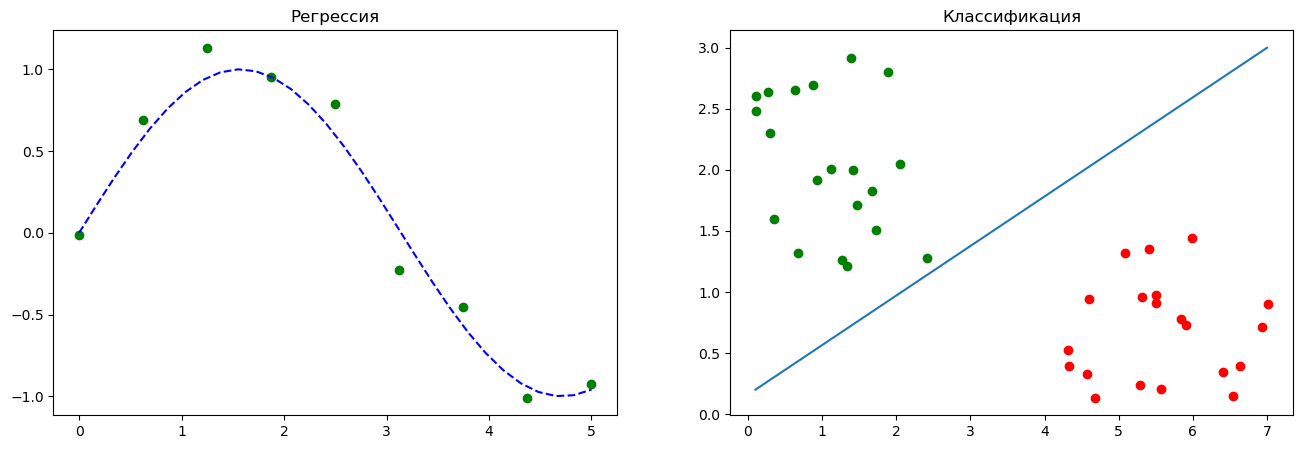

In [15]:
fig = plt.figure(figsize = (16, 5))
fig.add_subplot(1, 2, 1)
x = np.linspace(0, 5, 30)
y = np.sin(x)
plt.plot(x, y, 'b--')

plt.title('Регрессия')
x_dots = np.linspace(0, 5, 9)
noise = np.random.uniform(-0.25, 0.25, 9)
y_dots = np.sin(x_dots) + noise 
plt.scatter(x_dots, y_dots, color = 'g')

fig.add_subplot(1,2,2)
plt.title('Классификация')
plt.plot([0.1, 7], [0.2, 3])
x_top, y_top = np.random.uniform(0.1, 2.5, 20),\
      np.random.uniform(1.2, 3.1, 20)
plt.scatter(x_top, y_top, color = 'g')

x_bot, y_bot = np.random.uniform(4.2, 7.1, 20),\
                np.random.uniform(0.1, 1.5, 20)
plt.scatter(x_bot, y_bot, color = 'r')

fig = plt.figure 

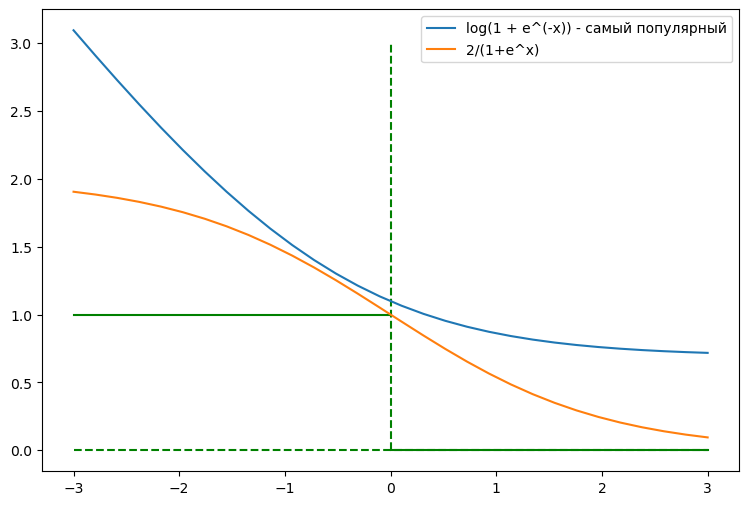

In [16]:
fig = plt.figure(figsize=(9, 6))
fig.add_subplot(1, 1, 1)
plt.plot([0, 0], [0, 3], 'g--')
plt.plot([-3, 3], [0, 0], 'g--')

plt.plot([-3, 0], [1, 1], 'g')
plt.plot([0, 3], [0, 0], 'g')

x = np.linspace(-3, 3, 30)
y = np.log1p(1 + np.exp(-x))
plt.plot(x, y, label = 'log(1 + e^(-x)) - самый популярный')

y2 = 2 / (1 + np.exp(x))
plt.plot(x, y2, label = '2/(1+e^x)')
plt.legend()


$$\text{Так как мы не можем находить производную от зелёной функции, так как она везде равна 0, а в x = 0 вообще не существует, } \\
\text{мы будем использовать метод верхней оценки - когда мы дифференциируем функцию, которая всюду больше чем изначальная и которая дифференциируется} \\
\text{}

$$ \text{чтобы оценить вероятность, положим значения в значения в сигмойду:}\\
a(x_i) = \frac{1}{1 + e ^{-(\beta,x_i)}}, \ где \ (\beta,x_i) = \beta_1 x_1 + \beta_i x_i + ... + \beta_i x_i + \beta_{intercept}

Всё, что выше treshold - объект 1, ниже - 0, но и порог для treshold можно менять, в зависимости от баланса классов!


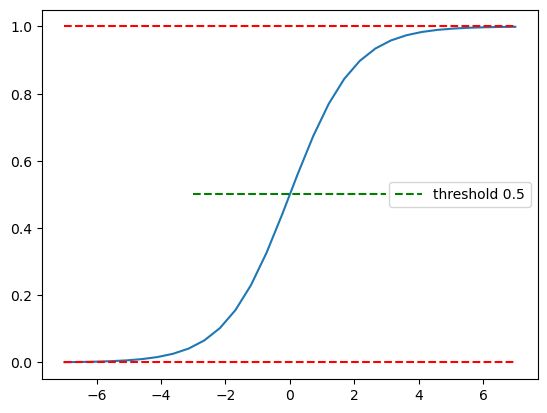

In [17]:

plt.plot(np.linspace(-7, 7, 30), 1/(1 + np.exp(-np.linspace(-7, 7, 30))))
plt.plot([-7, 7], [1, 1], 'r--')
plt.plot([-7, 7], [0, 0], 'r--')
plt.plot([-3, 3], [0.5, 0.5], 'g--', label = 'threshold 0.5')
plt.legend()
print('Всё, что выше treshold - объект 1, ниже - 0, но и порог для treshold можно менять, в зависимости от баланса классов!')

$$\text{ВОТТАКВОТ мы и получаем оценку вероятностей для наших предсказание, ееееееееее}

$$\textbf{4:} \\
\textbf{Метрики бинарной классификации.} \\
\text{ НАКОНЕЦТа (УЖЕ 10 ЧАСОВ ЭТОТ ФАЙЛ ПИЛЮ, ЗАЕ........)}\\
\text{Казалось бы, у нас есть метрика accuracy (точность). Типа, насколько правильные ответы наша моделька сделала, а точнее их доля (прим. 80\%)}\\
\text{Однако представим такую ситуацию, что у нас \{1: 90 шт., 0: 10 шт.\}, то есть жоский дизбаланс классов} \\
\text{Тогда модель }y_{pred} = 1 \ \text{ покажет accuracy = 0.9!} \\
\text{Что является полным идиотизмом. Поэтому для бинарной классификации нужны другие метрики.} \\
\text{Построим матрицу ошибок:}

In [18]:
pd.DataFrame({
    " ": ['a(x) = +1', 'a(x) = +1'],
    "y = +1" : ['True positve', 'False positive'],
    'y = -1' : ['False negative', 'True negative']
}, index=[' ', ' '])

,,y = +1,y = -1
,a(x) = +1,True positve,False negative
,a(x) = +1,False positive,True negative


$$\text{accuracy} = \frac{TN+TP}{TN+TP+FP+FN}\\
\text{другие две популярные метрики - precision и recall. (точность и полнота)} \\
precision = \frac{TP}{TP + FP} \ , \ recall = \frac{TP}{TP + FN} \\
\text{precision - доля реально положительных объектов среди тех, что мы назвали, }\\
\text{recall - сколько объектов среди тех, которые были положительными, модель смогла выявить} \\
\text{Модель редко обладает хорошим precision и recall одновременно. Зачастую нужен баланс.} \\

Итого, хороший precision - это когда доля неправильно размеченных объектов минимальна, но правильно размеченных - высока
хороший recall - это когда модель покрывает как моэно больше количество положительных классов, которые изначально были в выборке


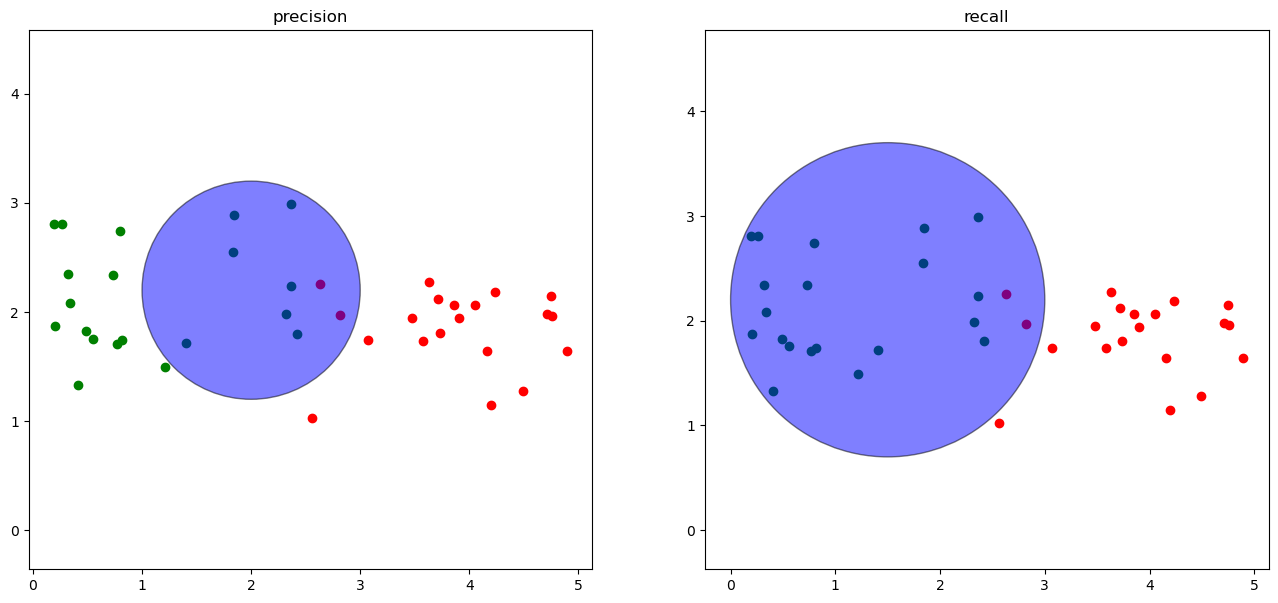

In [19]:
import matplotlib.patches as patches
fig = plt.figure(figsize = (16, 7))
ax = fig.add_subplot(1, 2, 1)
plt.title('precision')
x_top, y_top = np.random.uniform(0.1, 2.5, 20),\
      np.random.uniform(1.2, 3.1, 20)
x_bot, y_bot = np.random.uniform(2.5, 5, 20),\
                np.random.uniform(1, 2.5, 20)

plt.scatter(x_top, y_top, color = 'g') 
plt.scatter(x_bot, y_bot, color = 'r')
c = patches.Circle((2, 2.2), 1, edgecolor='black', facecolor='blue', alpha=0.5)
ax.add_patch(c)
ax.axis('equal')

ax = fig.add_subplot(1, 2, 2)
plt.title('recall')
plt.scatter(x_top, y_top, color = 'g') 
plt.scatter(x_bot, y_bot, color = 'r')
c = patches.Circle((1.5, 2.2), 1.5, edgecolor='black', facecolor='blue', alpha=0.5)
ax.add_patch(c)
ax.axis('equal')
print(f'Итого, хороший precision - это когда доля неправильно размеченных объектов минимальна, но правильно размеченных - высока\n'
      f'хороший recall - это когда модель покрывает как моэно больше количество положительных классов, которые изначально были в выборке')

$$\text{Мы можем посчитать среднее между precision и recall, можем среднее геометрическое} \\
avg_{a} = \frac{1}{2} (precision + recall) \ ; \ avg_g = \sqrt{precision \cdot recall}

In [20]:
def lines(function, name, legend : tuple = False):
    x = np.linspace(0, 1.1, 100)
    y = np.linspace(0, 1.1, 100)
    X, Y = np.meshgrid(x, y)

    Z = function(X, Y)
    plt.title(name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.contourf(X, Y, Z, 10)
    plt.colorbar(label='Function Value')
    if not legend: return
    precision, recall, thresh = legend
    plt.legend([f'precision = {precision:.3f}', f'recall = {recall:.3f}', f'tresh = {thresh:.3f}'])

C:\Users\Хозяин\AppData\Local\Temp\ipykernel_18104\830078656.py:9: RuntimeWarning: invalid value encountered in divide
  f_mera = lambda a, b : 2 * a * b / (a + b)
C:\Users\Хозяин\AppData\Local\Temp\ipykernel_18104\830078656.py:14: RuntimeWarning: invalid value encountered in divide
  f_mera_beta = lambda a, b : (1 + beta ** 2) * a * b / (beta**2 * a + b)
C:\Users\Хозяин\AppData\Local\Temp\ipykernel_18104\830078656.py:19: RuntimeWarning: invalid value encountered in divide
  f_mera_beta = lambda a, b : (1 + beta ** 2) * a * b / (beta**2 * a + b)
C:\Users\Хозяин\AppData\Local\Temp\ipykernel_18104\830078656.py:24: RuntimeWarning: invalid value encountered in divide
  f_mera_beta = lambda a, b : (1 + beta ** 2) * a * b / (beta**2 * a + b)


Чем больше Beta, тем больше уклон в recall, и наоборот, чем ближе beta к 0, тем больше уклон в precision


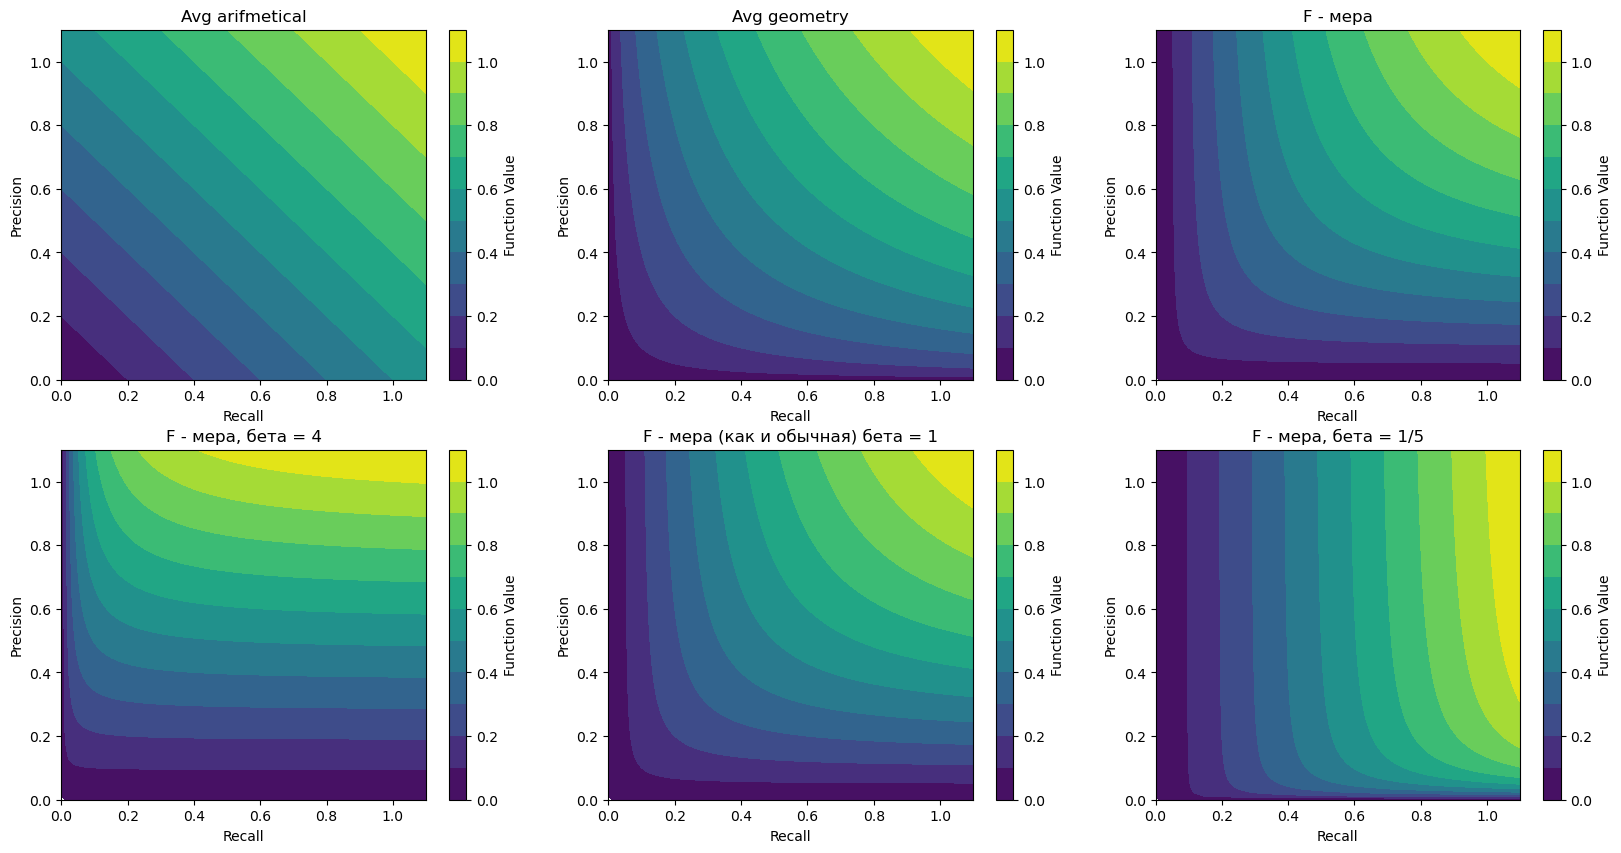

In [21]:
fig = plt.figure(figsize = (20, 10))
fig.add_subplot(2,3, 1)
avg_a = lambda a, b : 1/2 * (a + b)
lines(avg_a, 'Avg arifmetical')
fig.add_subplot(2, 3, 2)
avg_g = lambda a, b : (a*b) ** (1/2)
lines(avg_g, 'Avg geometry')
fig.add_subplot(2, 3, 3)
f_mera = lambda a, b : 2 * a * b / (a + b)
lines(f_mera, 'F - мера')

fig.add_subplot(2, 3, 4)
beta = 4
f_mera_beta = lambda a, b : (1 + beta ** 2) * a * b / (beta**2 * a + b)
lines(f_mera_beta, 'F - мера, бета = 4')

fig.add_subplot(2, 3, 5)
beta = 1
f_mera_beta = lambda a, b : (1 + beta ** 2) * a * b / (beta**2 * a + b)
lines(f_mera_beta, 'F - мера (как и обычная) бета = 1')

fig.add_subplot(2, 3, 6)
beta = 1/5
f_mera_beta = lambda a, b : (1 + beta ** 2) * a * b / (beta**2 * a + b)
lines(f_mera_beta, 'F - мера, бета = 1/5')
print('Чем больше Beta, тем больше уклон в recall, и наоборот, чем ближе beta к 0, тем больше уклон в precision')